# Model Stock Returns 


using normal random variable and demonstrate the importance of distributions in identifying financial risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


## Microsoft Stock Analysis

In [20]:
ms = pd.read_csv('data/microsoft.csv',index_col=0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [21]:
# Distribution of Log return
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
ms.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


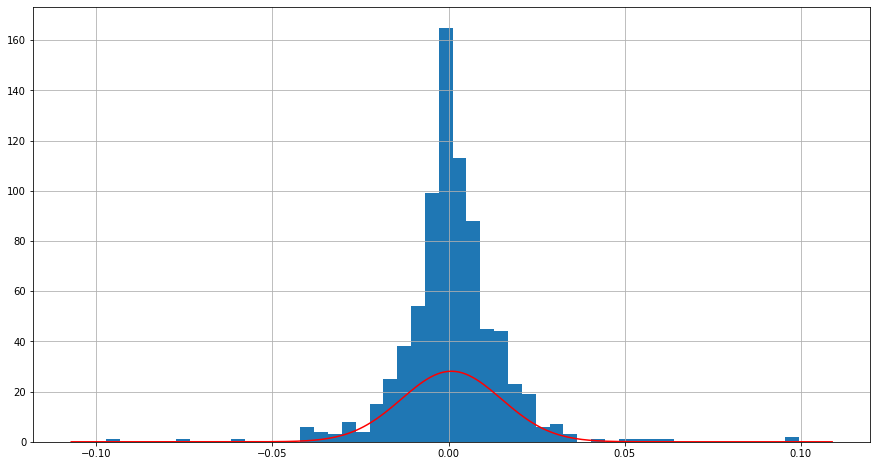

In [22]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [32]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677866


In [33]:
# calculating the probability that the stock price of microsoft will drop over 10% in a day
prob_return10 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return10)

The Probability is  6.056775634858584e-13


## Apple Stock Analysis

In [18]:
aapl = pd.read_csv('data/apple.csv',index_col=0)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


<Axes: xlabel='Date'>

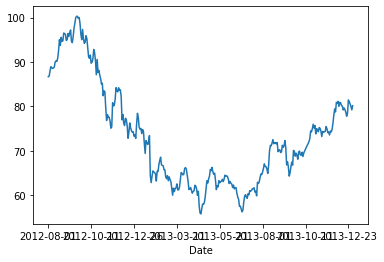

In [19]:
aapl.loc['2012-08-01':'2013-8-01','Close'].plot()

It is really crucial in risk management. 

For example, the stock price of Apple drop over 40% from August 2012 to May 2013, roughly one year. 

We need to compute what's the chance that the yearly return can be less than negative 40%. 

Is that possible, or just an extreme case like black swan. 

Lets compute log daily return for stock price of Apple.

In [23]:
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.010474
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.017396
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.007323
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.008185
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.005509


The histogram of a return is symmetric and bell shaped, which is very similar to normal distribution. 

<Axes: >

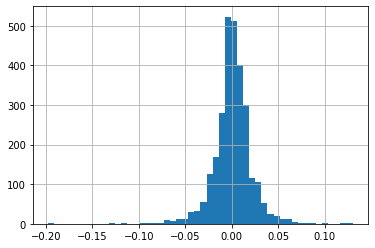

In [24]:
aapl['LogReturn'].hist(bins=50)

Using scipy which is a scientific computation package of python, we can get density function and a cumulative distribution function. 

norm.pdf where a given density for each possible value of a normal random variable. 

In fact normal random variable can take values from positive infinity to negative infinity. In Python code here, we get the density between -4 and 4 for simplicity. 

Two parameters 0, 1 in norm.pdf gives the mean and the standard deviation of a normal random variable. 

This normal random variable is also called a standard normal random variable, and its distribution is also called z-distribution. 

You can change these two values in order to get a different normal variables. 

Because, the density functions of a normal variables are only related to their mean and their variance. 

We also can get a cumulative distribution function, or in short a CDF which outputs the probability for the area, and lower side of each possible value. 

On the left side of this slide is the graph for normal density, symmetric with a mean and symmetric center. 

It is also bell shaped. 

In [26]:
density_2 = pd.DataFrame()

# In fact normal random variable can take values from positive infinity to negative infinity. 
# In Python code here, we get the density between -4 and 4 for simplicity. 
density_2['x'] = np.arange(-4,4,0.001)

# Two parameters 0, 1 in norm.pdf gives the mean and the standard deviation of a normal random variable. 
# This normal random variable is also called a standard normal random variable, and its distribution is also called z-distribution. 
# You can change these two values in order to get a different normal variables. 
density_2['pdf'] = norm.pdf(density_2['x'],0,1) # get pdf
density_2['cdf'] = norm.cdf(density_2['x'],0,1) # get cdf

# Because, the density functions of a normal variables are only related to their mean and their variance. 
# We also can get a cumulative distribution function, or in short a CDF which outputs the probability for the area, 
# and lower side of each possible value. On the left side of this slide is the graph for normal


We also can get a cumulative distribution function, or in short a CDF which outputs the probability for the area, and lower side of each possible value. On the left side of this slide is the graph for normal density, symmetric with a mean and symmetric center. It is also bell shaped. On the right side that is cumulative distribution function, where x takes large values. The cumulative probability will approach 1. We can model daily stock return using normal distribution. We do not know the real mean and standard deviation of this normal random variable. We have a large collection of data return from historic data. We can compute the mean and the standard deviation in this collection. They are not the same as those of normal variable, but close enough, as this shown on the right. Then, what is the chance data loss can be more than 5%? First, we will plot the

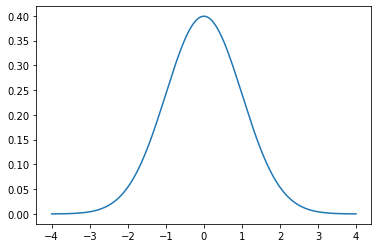

In [27]:
plt.plot(density_2['x'],density_2['pdf'])

Because, the density functions of a normal variables are only related to their mean and their variance. 

We also can get a cumulative distribution function, or in short a CDF which outputs the probability for the area, and lower side of each possible value.

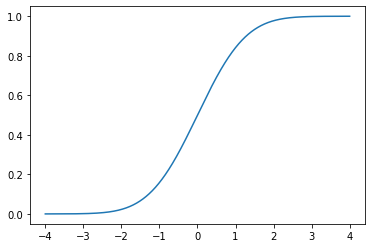

In [28]:
plt.plot(density_2['x'],density_2['cdf'])

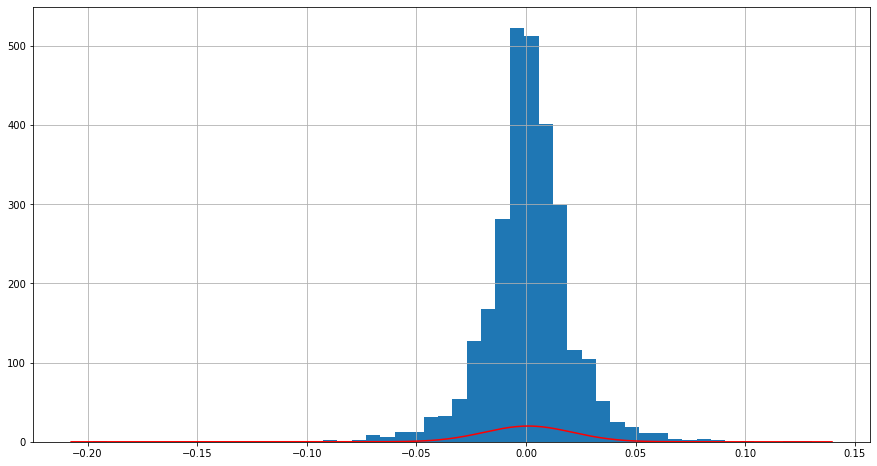

In [25]:
mu_aapl = aapl['LogReturn'].mean()
sigma_aapl = aapl['LogReturn'].std(ddof=1)

density_aapl = pd.DataFrame()
density_aapl['x'] = np.arange(aapl['LogReturn'].min()-0.01, aapl['LogReturn'].max()+0.01, 0.001)
density_aapl['pdf'] = norm.pdf(density_aapl['x'], mu_aapl, sigma_aapl)

aapl['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density_aapl['x'], density_aapl['pdf'], color='red')
plt.show()

In [36]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.010474
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.017396
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.007323
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.008185
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.005509


In [29]:
denApp =  pd.DataFrame()
denApp['x'] = np.arange(-0.1,0.1,0.001)
denApp['pdf'] = norm.pdf(denApp['x'],mu_aapl,sigma_aapl)

We have a large collection of data return from historic data. 

We can compute the mean and the standard deviation in this collection. They are not the same as those of normal variable, but close enough.

In [38]:
mu_appl_mean = aapl['LogReturn'].mean()
sigma_appl_ = aapl['LogReturn'].std(ddof=1)
print(mu_appl_mean,sigma_appl_)

0.000975467759150088 0.020045447615854962


In [31]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return_aapl = norm.cdf(-0.05, mu_aapl, sigma_aapl)
print('The Probability is ', prob_return_aapl)

The Probability is  0.005495344250959507


In [34]:
# probability that the stock price of microsoft will drop over 10% in a day
prob_return_aapl_10 = norm.cdf(-0.10, mu_aapl, sigma_aapl)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677866


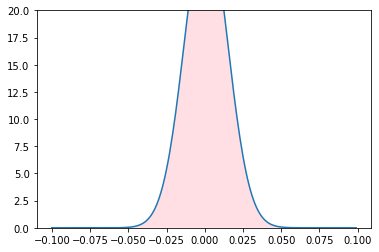

In [42]:
plt.ylim(0,20)
plt.plot(denApp['x'],denApp['pdf'])
# Fill the area under the curve
plt.fill_between(
    x=np.arange(-0.1, 0.05, 0.0001),
    y1=0,
    y2=norm.pdf(np.arange(-0.1, 0.05, 0.0001), mu, sigma),
    facecolor='pink',
    alpha=0.5
)

### Calculate the probability of the stock price will drop over a certain percentage in a year

In [43]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.0029123633133305506


In [45]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.20, mu, sigma)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  9.29228415841232e-46


## Calculate Value at risk (VaR)

In [46]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.02252336240706501


In [47]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.02252336240706501
95% quantile  0.02416382537931104


In [48]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
75% quantile  0.01039252081066101


Roll two dice and X is the sum of faces values. If we roll them 5 times and get 2,3,4,5,6. What is true of X?
- X is a random variable

Roll two dice and X is the sum of faces values. If we roll them 5 times and get 2,3,4,5,6. What do we know about X?
- We have 5 observations of X

Roll two dice and X is the sum of faces values. If we roll them 5 times and get 2,3,4,5,6. X is a __ random variable.
- discrete

Why do we use relative frequency instead of frequency?
- Relative frequency can be used to compare the ratio of values between difference collections with difference number of values

What can we say about relative frequency when we have large number of trials?
- Relative frequency becomes approximately the distribution of the corresponding random variable

What is the notion of  "95% Value at Risk" ?
- 95% VaR measures the amount of investment you can lose, at the worst 5% scenario

Given a probability density function, f(x) = 1/100, what is the probability P(10<X<20), where X~Uniform[0, 100]?
- (20- 10) * 1/100

What methods should we use to get the cdf and pdf of normal distribution?
- norm.cdf() and norm.pdf() from scipy.stats

Which additional library should we import when we want to calculate log daily return specifically?
- Numpy

What is the distribution of stock returns suggested by Fama and French in general?
- Close to normal distribution but with fat tail

The "95% Value at Risk" (VaR) is a commonly used financial risk measurement that provides an estimate of the maximum potential loss an investment or portfolio could experience over a specified time horizon with a certain level of confidence. In the context of the "95% VaR," the confidence level is 95%.

In other words, the 95% VaR represents the potential loss that is not expected to be exceeded with a probability of 95%. It provides an upper limit on the potential losses that an investment or portfolio might face, given the historical distribution of returns or price movements.

Here's an example to illustrate the concept:

Let's say you have a portfolio of investments, and you calculate the 95% VaR to be $10,000 over a one-week time horizon. This means that there is a 95% probability that your portfolio's losses will not exceed $10,000 within the next week.

In mathematical terms, the 95% VaR can be defined as follows:

\[ \text{95% VaR} = \text{Percentile}_{95}(\text{Portfolio Returns}) \]

Where:
- \(\text{Percentile}_{95}(\text{Portfolio Returns})\) is the value below which 95% of the historical portfolio returns fall.

To calculate the 95% VaR, you need a historical dataset of returns or price movements for the investment or portfolio. You sort this dataset in ascending order and then find the value at the 5th percentile (since you're interested in the worst 5% of outcomes to represent the potential losses).

It's important to note that VaR has its limitations. It assumes that historical patterns will repeat, which might not hold true during times of extreme market volatility or unprecedented events. Additionally, VaR doesn't provide information about the potential magnitude of losses beyond the specified confidence level. For this reason, it's often used alongside other risk measures and stress-testing techniques.

In summary, the "95% Value at Risk" is a risk management tool that quantifies the potential loss an investment or portfolio might experience with a 95% level of confidence over a specific time horizon based on historical data.